In [12]:
from sklearn.datasets import make_classification
from numpy import mean, std
from sklearn.model_selection import KFold, RepeatedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression

In [13]:
#Defining Dataset
X, y = make_classification(n_samples=1200, n_features=25, n_informative=15, n_redundant=5, random_state=1)
print(X.shape, y.shape)

(1200, 25) (1200,)


In [14]:
# evaluating a logistic regression model using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
# defining dataset
X, y = make_classification(n_samples=1200, n_features=25, n_informative=15, n_redundant=5, random_state=1)
# cross-validation
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = LogisticRegression()
# evaluating model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# performance evaluation
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
     

Accuracy: 0.820 (0.022)


In [15]:
# Repeated K-Fold cross-validation
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [16]:
# evaluating a logistic regression model using repeated k-fold cross-validation
#Importing Repeated K Fold from sklearn
from sklearn.model_selection import RepeatedKFold

In [17]:
# creating dataset
X, y = make_classification(n_samples=1200, n_features=25, n_informative=15, n_redundant=5, random_state=1)
# cross-validation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# creating a model
model = LogisticRegression()
# evaluating the model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.820 (0.033)


>1 mean=0.8200 se=0.007
>2 mean=0.8217 se=0.007
>3 mean=0.8203 se=0.006
>4 mean=0.8200 se=0.005
>5 mean=0.8212 se=0.005
>6 mean=0.8203 se=0.004
>7 mean=0.8208 se=0.004
>8 mean=0.8214 se=0.004
>9 mean=0.8214 se=0.003
>10 mean=0.8221 se=0.003
>11 mean=0.8218 se=0.003
>12 mean=0.8214 se=0.003
>13 mean=0.8215 se=0.003
>14 mean=0.8214 se=0.003
>15 mean=0.8215 se=0.003


C:\Users\Dhanesh\AppData\Local\Temp\ipykernel_10000\3576708208.py:34: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  pyplot.boxplot(results, labels=[str(r) for r in repeats], showmeans=True)


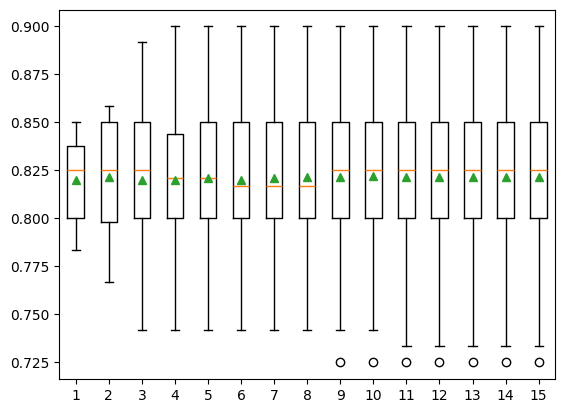

In [18]:
# comparing the number of repeats for repeated k-fold cross-validation
from scipy.stats import sem
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

# evaluating a model with a given number of repeats
def evaluate_model(X, y, repeats):
 # preparing the cross-validation procedure
 cv = RepeatedKFold(n_splits=10, n_repeats=repeats, random_state=1)
 # creating model
 model = LogisticRegression()
 # evaluating model
 scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
 return scores

# creating dataset
X, y = make_classification(n_samples=1200, n_features=25, n_informative=15, n_redundant=5, random_state=1)
# configurations to test
repeats = range(1,16)
results = list()
for r in repeats:
 # evaluating using a given number of repeats
 scores = evaluate_model(X, y, r)
 # summarize
 print('>%d mean=%.4f se=%.3f' % (r, mean(scores), sem(scores)))
 # store
 results.append(scores)
# plot the results
pyplot.boxplot(results, labels=[str(r) for r in repeats], showmeans=True)
pyplot.show()